In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from collections import Counter
import itertools

In [3]:
data = pd.read_csv("telco.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
mu1, sigma1 = 50, 30
normal_sample = np.random.normal(mu1, sigma1, 10000)

mu2, sigma2 = 60, 10
noise = np.random.normal(mu2, sigma2, 1000)

final_sample = list(np.concatenate([normal_sample, noise]))

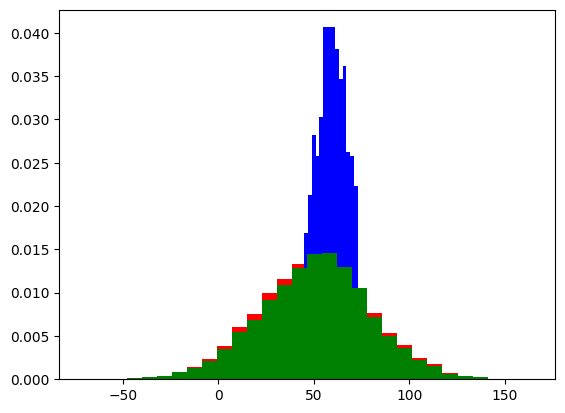

In [6]:
count, bins, ignored = plt.hist(normal_sample, 30, density=True, color="red")
count, bins, ignored = plt.hist(noise, 30, density=True, color="blue")
count, bins, ignored = plt.hist(final_sample, 30, density=True, color="green")

plt.show()

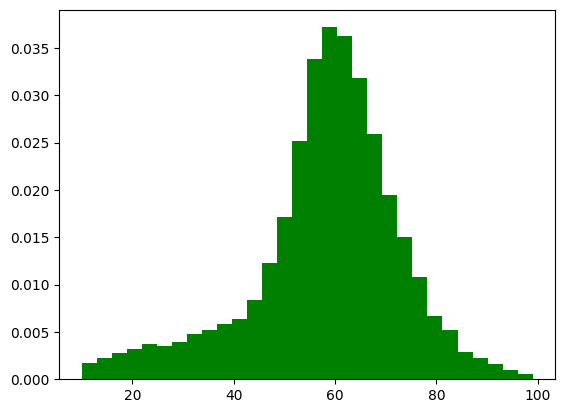

In [7]:

alpha = 0.3
# Precompute the Ziggurat layers for both normal distributions (you can optimize this further)
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Generate random samples using the mixture model with rejection sampling
def sample_mixture_of_normals(mu1, sigma1, mu2, sigma2, alpha):
    while True:
        # Select which distribution to sample from
        if np.random.uniform() <= alpha:
            # Sample from the first normal distribution
            sample = np.random.normal(mu1, sigma1)
            if np.random.rand() <= normal_pdf(sample, mu1, sigma1) / normal_pdf(sample, mu1, sigma1 + sigma2):
                return sample
        else:
            # Sample from the second normal distribution
            sample = np.random.normal(mu2, sigma2)
            if np.random.rand() <= normal_pdf(sample, mu2, sigma2) / normal_pdf(sample, mu1, sigma2):
                return sample

# Example: Sample 1000 samples from the mixture of two normal distributions
samples = [sample_mixture_of_normals(mu1, sigma1, mu2, sigma2, alpha) for _ in range(7043)]
samples_modified = [int(i) for i in list(map(lambda x: random.randint(20, 80) if x < 10 or x > 100 else x, samples))]
plt.hist(samples_modified, 30, density=True, color="green")
plt.show()

In [8]:
print(samples_modified, len(samples_modified), sep="\n")

[37, 47, 62, 39, 19, 57, 67, 63, 63, 16, 44, 63, 65, 60, 57, 51, 66, 63, 54, 54, 11, 57, 46, 56, 59, 87, 64, 61, 73, 62, 33, 79, 63, 72, 62, 67, 28, 65, 74, 52, 38, 20, 62, 77, 59, 67, 51, 63, 61, 68, 82, 71, 26, 62, 61, 59, 57, 61, 36, 83, 56, 36, 56, 41, 49, 12, 63, 52, 23, 55, 37, 63, 58, 55, 65, 67, 56, 53, 62, 79, 87, 66, 98, 66, 48, 53, 72, 44, 66, 35, 60, 55, 69, 72, 56, 59, 73, 72, 59, 38, 49, 86, 64, 60, 28, 58, 49, 76, 76, 50, 54, 63, 61, 54, 80, 64, 62, 72, 58, 52, 61, 14, 32, 58, 69, 61, 67, 22, 38, 18, 65, 67, 47, 11, 20, 69, 47, 71, 72, 31, 25, 70, 63, 61, 60, 75, 54, 64, 48, 62, 47, 68, 41, 63, 79, 47, 49, 61, 92, 73, 67, 81, 67, 72, 74, 58, 66, 41, 73, 60, 67, 51, 68, 59, 63, 76, 52, 68, 27, 80, 75, 32, 53, 58, 67, 48, 56, 58, 80, 66, 94, 61, 66, 65, 42, 58, 31, 70, 24, 61, 60, 65, 58, 52, 46, 61, 37, 77, 56, 68, 51, 43, 79, 73, 67, 72, 65, 62, 72, 26, 90, 69, 68, 35, 66, 51, 59, 70, 61, 63, 54, 63, 89, 74, 54, 63, 50, 53, 78, 54, 51, 50, 59, 59, 63, 63, 65, 55, 41, 58,

In [9]:
data["age"] = samples_modified
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,37
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,47
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,62
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,39
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,19


In [10]:
def normalize_list(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]


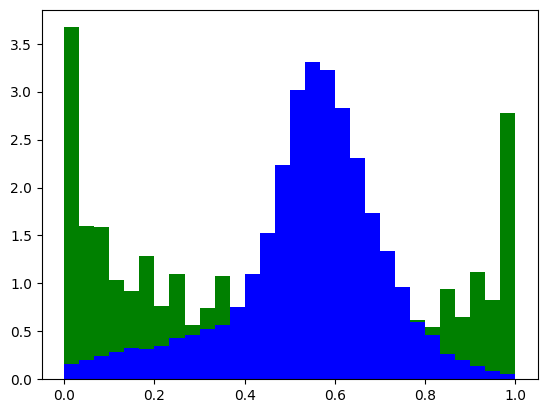

In [11]:
plt.hist(normalize_list(data["tenure"]), 30, density=True, color="green")
plt.hist(normalize_list(data["age"]), 30, density=True, color="blue")
plt.show()
# the company should rethink its targeted group 

In [80]:
cities_info = [
    {"city": "New York", "zip_code": "10001", "city_code": "212"},
    {"city": "Los Angeles", "zip_code": "90001", "city_code": "213"},
    {"city": "Chicago", "zip_code": "60601", "city_code": "312"},
    {"city": "Houston", "zip_code": "77001", "city_code": "713"},
    {"city": "Phoenix", "zip_code": "85001", "city_code": "602"},
    {"city": "Philadelphia", "zip_code": "19101", "city_code": "215"},
    {"city": "San Antonio", "zip_code": "78201", "city_code": "210"},
    {"city": "San Diego", "zip_code": "92101", "city_code": "858"},
    {"city": "Dallas", "zip_code": "75201", "city_code": "214"},
    {"city": "San Jose", "zip_code": "95101", "city_code": "408"},
    {"city": "Austin", "zip_code": "73301", "city_code": "512"},
    {"city": "Jacksonville", "zip_code": "32201", "city_code": "904"},
    {"city": "Fort Worth", "zip_code": "76101", "city_code": "817"},
    {"city": "Columbus", "zip_code": "43201", "city_code": "614"},
    {"city": "San Francisco", "zip_code": "94101", "city_code": "415"},
    {"city": "Charlotte", "zip_code": "28201", "city_code": "704"},
    {"city": "Indianapolis", "zip_code": "46201", "city_code": "317"},
    {"city": "Seattle", "zip_code": "98101", "city_code": "206"},
    {"city": "Denver", "zip_code": "80201", "city_code": "303"},
    {"city": "Washington D.C.", "zip_code": "20001", "city_code": "202"},
]
print(len(cities_info))

print(max([len(i["city"]) for i in cities_info]))

20
15


In [81]:
def generate_normal_in_range(mean, std_dev, lower_bound, upper_bound, size):
    samples = []
    
    while len(samples) < size:
        sample = np.random.normal(mean, std_dev)
        if lower_bound <= sample <= upper_bound:
            samples.append(sample)
    return np.array(samples)

def generate_uniform_in_range(lower_bound, upper_bound, size):
    samples = []
    
    while len(samples) < size:
        sample = np.random.uniform(upper_bound)
        if lower_bound <= sample <= upper_bound:
            samples.append(sample)
    return np.array(samples)

In [88]:

uniform2_sample_second = generate_uniform_in_range(0, 20, 10000)


mu4, sigma4 = 18, 1
noise_second = generate_normal_in_range(mu4, sigma4, 0, 20, 2000)

mu5, sigma5 = 7, 1
noise2_second = generate_normal_in_range(mu5, sigma5, 0, 20, 2000)

final_sample = list(np.concatenate([uniform2_sample_second, noise_second, noise2_second]))
print(len(final_sample))


14000


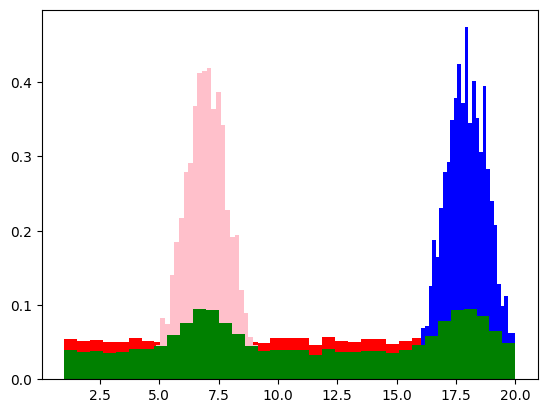

In [89]:
count, bins, ignored = plt.hist(uniform2_sample_second, 35, density=True, color="red")
count, bins, ignored = plt.hist(noise_second, 35, density=True, color="blue")
count, bins, ignored = plt.hist(noise2_second, 35, density=True, color="pink")
count, bins, ignored = plt.hist(final_sample, 35, density=True, color="green")

plt.show()

In [90]:
uniform_custom_sample = [int(final_sample[i]) for i in [int(np.random.uniform(13999)) for i in range(7043)]]

print(uniform_custom_sample)

[5, 14, 14, 15, 17, 19, 6, 12, 3, 15, 19, 8, 3, 7, 17, 17, 5, 15, 5, 4, 3, 7, 3, 14, 12, 3, 17, 7, 10, 5, 18, 7, 3, 6, 1, 10, 16, 16, 4, 17, 19, 8, 5, 6, 16, 5, 18, 6, 15, 17, 8, 4, 1, 7, 18, 6, 6, 15, 18, 18, 18, 12, 6, 6, 17, 7, 19, 6, 8, 18, 18, 17, 19, 19, 6, 16, 3, 5, 18, 18, 2, 7, 4, 12, 6, 18, 7, 4, 5, 7, 13, 1, 9, 5, 7, 15, 3, 7, 3, 7, 7, 14, 5, 9, 10, 4, 2, 1, 1, 8, 7, 13, 2, 16, 12, 9, 16, 18, 6, 8, 15, 16, 6, 6, 7, 13, 18, 8, 10, 9, 6, 9, 16, 3, 1, 16, 12, 4, 19, 5, 6, 14, 6, 17, 3, 17, 5, 7, 8, 8, 1, 16, 19, 8, 6, 4, 8, 1, 17, 12, 17, 9, 5, 18, 1, 15, 7, 9, 6, 12, 15, 16, 13, 16, 6, 9, 12, 7, 3, 10, 7, 4, 18, 14, 6, 12, 6, 5, 18, 14, 7, 16, 14, 18, 7, 7, 6, 6, 1, 6, 8, 16, 6, 13, 5, 13, 9, 13, 16, 13, 17, 18, 3, 5, 2, 19, 19, 6, 10, 6, 18, 15, 19, 11, 14, 1, 1, 18, 3, 15, 3, 18, 15, 8, 15, 15, 7, 17, 10, 5, 16, 3, 8, 2, 16, 2, 2, 9, 1, 18, 18, 10, 19, 6, 9, 6, 1, 15, 6, 9, 3, 7, 12, 15, 15, 19, 13, 19, 19, 8, 17, 9, 15, 8, 6, 17, 8, 19, 13, 19, 18, 14, 13, 7, 17, 12, 18, 17

In [91]:
print([cities_info[i]["city"] for i in uniform_custom_sample])

['Philadelphia', 'San Francisco', 'San Francisco', 'Charlotte', 'Seattle', 'Washington D.C.', 'San Antonio', 'Fort Worth', 'Houston', 'Charlotte', 'Washington D.C.', 'Dallas', 'Houston', 'San Diego', 'Seattle', 'Seattle', 'Philadelphia', 'Charlotte', 'Philadelphia', 'Phoenix', 'Houston', 'San Diego', 'Houston', 'San Francisco', 'Fort Worth', 'Houston', 'Seattle', 'San Diego', 'Austin', 'Philadelphia', 'Denver', 'San Diego', 'Houston', 'San Antonio', 'Los Angeles', 'Austin', 'Indianapolis', 'Indianapolis', 'Phoenix', 'Seattle', 'Washington D.C.', 'Dallas', 'Philadelphia', 'San Antonio', 'Indianapolis', 'Philadelphia', 'Denver', 'San Antonio', 'Charlotte', 'Seattle', 'Dallas', 'Phoenix', 'Los Angeles', 'San Diego', 'Denver', 'San Antonio', 'San Antonio', 'Charlotte', 'Denver', 'Denver', 'Denver', 'Fort Worth', 'San Antonio', 'San Antonio', 'Seattle', 'San Diego', 'Washington D.C.', 'San Antonio', 'Dallas', 'Denver', 'Denver', 'Seattle', 'Washington D.C.', 'Washington D.C.', 'San Antonio'

In [92]:
data["city"] = [cities_info[i]["city"] for i in uniform_custom_sample]

In [93]:
data["zip_code"] = [cities_info[i]["zip_code"] for i in uniform_custom_sample]
data["city_code"] = [cities_info[i]["city_code"] for i in uniform_custom_sample]

In [94]:
data.head(20)

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,city,zip_code,city_code,Plan
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,37,Philadelphia,19101,215,DSL_plan_48
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.5,No,47,San Francisco,94101,415,DSL_plan_24
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,62,San Francisco,94101,415,DSL_plan_16
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,39,Charlotte,28201,704,DSL_plan_20
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,19,Seattle,98101,206,Fiber optic_plan_64
5,9305-CDSKC,Female,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Electronic check,99.65,820.5,Yes,57,Washington D.C.,20001,202,Fiber optic_plan_53
6,1452-KIOVK,Male,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),89.10,1949.4,No,67,San Antonio,78201,210,Fiber optic_plan_46
7,6713-OKOMC,Female,No,No,10,No,No phone service,DSL,Yes,No,...,No,Mailed check,29.75,301.9,No,63,Fort Worth,76101,817,DSL_plan_32
8,7892-POOKP,Female,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Electronic check,104.80,3046.05,Yes,63,Houston,77001,713,Fiber optic_plan_49
9,6388-TABGU,Male,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,Bank transfer (automatic),56.15,3487.95,No,16,Charlotte,28201,704,DSL_plan_16


In [21]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'age',
       'city', 'zip_code', 'city_code'],
      dtype='object')

In [22]:
data["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [23]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'age',
       'city', 'zip_code', 'city_code'],
      dtype='object')

In [96]:
# Generate all possible boolean combinations (2^6 = 64 combinations)
bool_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
bool_combinations = list(itertools.product(["Yes", "No"], repeat=len(bool_columns)))

# Map each combination to a unique plan name (sal_1, sal_2, ...)
combination_map = {combo: f"plan_{i+1}" for i, combo in enumerate(bool_combinations)}

# Function to classify the plan based on the boolean values and InternetService
def classify_plan(row):
    # Extract boolean values for the specific row
    bool_values = tuple(row[bool_columns])
    
    # Get the corresponding plan from the combination map
    bundle = combination_map.get(bool_values, "unknown_plan")
    
    # Include the 'InternetService' value in the plan name (optional)
    return f"{row['InternetService']}_{bundle}"

# Apply the function to the dataframe to create the 'Plan' column
data['bundle'] = data.apply(classify_plan, axis=1)

# Show the DataFrame with the new 'Plan' column
print(data)


      customerID  gender Partner Dependents  tenure PhoneService  \
0     7590-VHVEG  Female     Yes         No       1           No   
1     5575-GNVDE    Male      No         No      34          Yes   
2     3668-QPYBK    Male      No         No       2          Yes   
3     7795-CFOCW    Male      No         No      45           No   
4     9237-HQITU  Female      No         No       2          Yes   
...          ...     ...     ...        ...     ...          ...   
7038  6840-RESVB    Male     Yes        Yes      24          Yes   
7039  2234-XADUH  Female     Yes        Yes      72          Yes   
7040  4801-JZAZL  Female     Yes        Yes      11           No   
7041  8361-LTMKD    Male     Yes         No       4          Yes   
7042  3186-AJIEK    Male      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No           

In [101]:
data.tail(30)

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,city,zip_code,city_code,Plan,bundle
7013,1685-BQULA,Female,No,No,40,Yes,Yes,Fiber optic,No,Yes,...,Bank transfer (automatic),93.40,3756.4,No,86,Charlotte,28201,704,Fiber optic_plan_38,Fiber optic_plan_38
7014,9053-EJUNL,Male,No,No,41,Yes,Yes,Fiber optic,No,Yes,...,Electronic check,89.20,3645.75,No,68,Denver,80201,303,Fiber optic_plan_46,Fiber optic_plan_46
7015,0666-UXTJO,Male,Yes,No,34,Yes,No,Fiber optic,No,No,...,Credit card (automatic),85.20,2874.45,No,61,Seattle,98101,206,Fiber optic_plan_54,Fiber optic_plan_54
7016,1471-GIQKQ,Female,No,No,1,Yes,No,DSL,No,Yes,...,Electronic check,49.95,49.95,No,61,Philadelphia,19101,215,DSL_plan_48,DSL_plan_48
7017,4807-IZYOZ,Female,No,No,51,Yes,No,No,No internet service,No internet service,...,Bank transfer (automatic),20.65,1020.75,No,68,Seattle,98101,206,No_unknown_plan,No_unknown_plan
7018,1122-JWTJW,Male,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,Mailed check,70.65,70.65,Yes,59,Jacksonville,32201,904,Fiber optic_plan_64,Fiber optic_plan_64
7019,9710-NJERN,Female,No,No,39,Yes,No,No,No internet service,No internet service,...,Mailed check,20.15,826,No,69,Denver,80201,303,No_unknown_plan,No_unknown_plan
7020,9837-FWLCH,Male,Yes,Yes,12,Yes,No,No,No internet service,No internet service,...,Electronic check,19.20,239,No,32,Jacksonville,32201,904,No_unknown_plan,No_unknown_plan
7021,1699-HPSBG,Male,No,No,12,Yes,No,DSL,No,No,...,Electronic check,59.80,727.8,Yes,67,Austin,73301,512,DSL_plan_58,DSL_plan_58
7022,7203-OYKCT,Male,No,No,72,Yes,Yes,Fiber optic,No,Yes,...,Electronic check,104.95,7544.3,No,61,San Antonio,78201,210,Fiber optic_plan_37,Fiber optic_plan_37


In [ ]:
data = data.drop("SeniorCitizen", axis= 1)
data.head()

In [99]:
data.to_csv("Telco_extended.csv", index = False)

In [29]:
data.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'age', 'city', 'zip_code',
       'city_code', 'Plan'],
      dtype='object')

In [30]:
combination_map

{('Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'): 'plan_1',
 ('Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'): 'plan_2',
 ('Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes'): 'plan_3',
 ('Yes', 'Yes', 'Yes', 'Yes', 'No', 'No'): 'plan_4',
 ('Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes'): 'plan_5',
 ('Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'): 'plan_6',
 ('Yes', 'Yes', 'Yes', 'No', 'No', 'Yes'): 'plan_7',
 ('Yes', 'Yes', 'Yes', 'No', 'No', 'No'): 'plan_8',
 ('Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'): 'plan_9',
 ('Yes', 'Yes', 'No', 'Yes', 'Yes', 'No'): 'plan_10',
 ('Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'): 'plan_11',
 ('Yes', 'Yes', 'No', 'Yes', 'No', 'No'): 'plan_12',
 ('Yes', 'Yes', 'No', 'No', 'Yes', 'Yes'): 'plan_13',
 ('Yes', 'Yes', 'No', 'No', 'Yes', 'No'): 'plan_14',
 ('Yes', 'Yes', 'No', 'No', 'No', 'Yes'): 'plan_15',
 ('Yes', 'Yes', 'No', 'No', 'No', 'No'): 'plan_16',
 ('Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes'): 'plan_17',
 ('Yes', 'No', 'Yes', 'Yes', 'Yes', 'No'): 'plan_18',
 ('Yes', 'No', 'Yes', 'Yes', 'No', '

In [103]:
# Boolean columns that determine the plan
bool_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Generate all possible boolean combinations (2^6 = 64 combinations)
bool_combinations = list(itertools.product([True, False], repeat=len(bool_columns)))

# Create the plan names for each InternetService
internet_services = ['DSL', 'Fiber optic', 'No_unknown']
plans = []

# Generate the plans for each InternetService
for service in internet_services:
    if service == 'No_unknown':
        # Only one row for "no" InternetService with all boolean values set to False
        plan_name = f"{service}_plan"
        plan_data = {'InternetService': service, 'bundle': plan_name}
        
        # Add the boolean column values (all False for "no")
        for col in bool_columns:
            plan_data[col] = False
            
        # Append the "no" row to the plans list
        plans.append(plan_data)
    else:
        # Generate the plans for dsl and fiberoptics
        for i, combo in enumerate(bool_combinations):
            plan_name = f"{service}_plan_{i+1}"
            
            # Create a dictionary for each plan with boolean values
            plan_data = {'InternetService': service, 'bundle': plan_name}
            
            # Add the boolean column values to the dictionary
            for j, col in enumerate(bool_columns):
                plan_data[col] = combo[j]
            
            # Append to the plans list
            plans.append(plan_data)

# Convert the list to a DataFrame
plans_df = pd.DataFrame(plans)

# Save the plans to a separate CSV file
plans_df.to_csv('plans.csv', index=False)

print(plans_df)  # Displaying the first few rows for verification


    InternetService               bundle  OnlineSecurity  OnlineBackup  \
0               DSL           DSL_plan_1            True          True   
1               DSL           DSL_plan_2            True          True   
2               DSL           DSL_plan_3            True          True   
3               DSL           DSL_plan_4            True          True   
4               DSL           DSL_plan_5            True          True   
..              ...                  ...             ...           ...   
124     Fiber optic  Fiber optic_plan_61           False         False   
125     Fiber optic  Fiber optic_plan_62           False         False   
126     Fiber optic  Fiber optic_plan_63           False         False   
127     Fiber optic  Fiber optic_plan_64           False         False   
128      No_unknown      No_unknown_plan           False         False   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
0                True         True         T

In [58]:
cities_info_ex = [
    {"city": "New York", "zip_code": "10001", "city_code": "212", "population": 8419600, "area_sq_miles": 302.6, "internet_coverage": 98, "average_income": 85000, "number_of_users": 6000000, "5G_coverage": True},
    {"city": "Los Angeles", "zip_code": "90001", "city_code": "213", "population": 3980400, "area_sq_miles": 469.5, "internet_coverage": 95, "average_income": 65000, "number_of_users": 3500000, "5G_coverage": True},
    {"city": "Chicago", "zip_code": "60601", "city_code": "312", "population": 2716000, "area_sq_miles": 234.0, "internet_coverage": 97, "average_income": 72000, "number_of_users": 2500000, "5G_coverage": True},
    {"city": "Houston", "zip_code": "77001", "city_code": "713", "population": 2328000, "area_sq_miles": 637.5, "internet_coverage": 93, "average_income": 61000, "number_of_users": 2200000, "5G_coverage": True},
    {"city": "Phoenix", "zip_code": "85001", "city_code": "602", "population": 1690000, "area_sq_miles": 517.6, "internet_coverage": 92, "average_income": 56000, "number_of_users": 1500000, "5G_coverage": True},
    {"city": "Philadelphia", "zip_code": "19101", "city_code": "215", "population": 1584200, "area_sq_miles": 142.7, "internet_coverage": 94, "average_income": 55000, "number_of_users": 1400000, "5G_coverage": True},
    {"city": "San Antonio", "zip_code": "78201", "city_code": "210", "population": 1547200, "area_sq_miles": 504.6, "internet_coverage": 90, "average_income": 52000, "number_of_users": 1300000, "5G_coverage": False},
    {"city": "San Diego", "zip_code": "92101", "city_code": "858", "population": 1424100, "area_sq_miles": 372.4, "internet_coverage": 96, "average_income": 70000, "number_of_users": 1300000, "5G_coverage": True},
    {"city": "Dallas", "zip_code": "75201", "city_code": "214", "population": 1341000, "area_sq_miles": 385.8, "internet_coverage": 93, "average_income": 62000, "number_of_users": 1200000, "5G_coverage": True},
    {"city": "San Jose", "zip_code": "95101", "city_code": "408", "population": 1035300, "area_sq_miles": 180.5, "internet_coverage": 97, "average_income": 106000, "number_of_users": 950000, "5G_coverage": True},
    {"city": "Austin", "zip_code": "73301", "city_code": "512", "population": 995484, "area_sq_miles": 326.5, "internet_coverage": 94, "average_income": 65000, "number_of_users": 900000, "5G_coverage": True},
    {"city": "Jacksonville", "zip_code": "32201", "city_code": "904", "population": 911507, "area_sq_miles": 874.5, "internet_coverage": 89, "average_income": 52000, "number_of_users": 800000, "5G_coverage": False},
    {"city": "Fort Worth", "zip_code": "76101", "city_code": "817", "population": 935508, "area_sq_miles": 349.2, "internet_coverage": 91, "average_income": 59000, "number_of_users": 850000, "5G_coverage": False},
    {"city": "Columbus", "zip_code": "43201", "city_code": "614", "population": 905748, "area_sq_miles": 223.1, "internet_coverage": 94, "average_income": 58000, "number_of_users": 800000, "5G_coverage": False},
    {"city": "San Francisco", "zip_code": "94101", "city_code": "415", "population": 815201, "area_sq_miles": 46.9, "internet_coverage": 99, "average_income": 118000, "number_of_users": 700000, "5G_coverage": True},
    {"city": "Charlotte", "zip_code": "28201", "city_code": "704", "population": 874579, "area_sq_miles": 308.6, "internet_coverage": 92, "average_income": 63000, "number_of_users": 800000, "5G_coverage": True},
    {"city": "Indianapolis", "zip_code": "46201", "city_code": "317", "population": 887232, "area_sq_miles": 368.2, "internet_coverage": 89, "average_income": 55000, "number_of_users": 780000, "5G_coverage": False},
    {"city": "Seattle", "zip_code": "98101", "city_code": "206", "population": 749256, "area_sq_miles": 142.5, "internet_coverage": 98, "average_income": 88000, "number_of_users": 700000, "5G_coverage": True},
    {"city": "Denver", "zip_code": "80201", "city_code": "303", "population": 735538, "area_sq_miles": 155.0, "internet_coverage": 95, "average_income": 68000, "number_of_users": 650000, "5G_coverage": True},
    {"city": "Washington D.C.", "zip_code": "20001", "city_code": "202", "population": 670050, "area_sq_miles": 68.3, "internet_coverage": 99, "average_income": 90000, "number_of_users": 600000, "5G_coverage": True},
]

print(len(cities_info_ex))

20


In [79]:
cities_info_ex = [
    {"city": "New York", "zip_code": "10001", "city_code": "212", "population": 8419600, "area_sq_miles": 302.6, "internet_coverage": 98, "average_income": 85000, "number_of_users": 6000000, "5G_coverage": True},
    {"city": "Los Angeles", "zip_code": "90001", "city_code": "213", "population": 3980400, "area_sq_miles": 469.5, "internet_coverage": 95, "average_income": 65000, "number_of_users": 3500000, "5G_coverage": True},
    {"city": "Chicago", "zip_code": "60601", "city_code": "312", "population": 2716000, "area_sq_miles": 234.0, "internet_coverage": 97, "average_income": 72000, "number_of_users": 2500000, "5G_coverage": True},
    {"city": "Houston", "zip_code": "77001", "city_code": "713", "population": 2328000, "area_sq_miles": 637.5, "internet_coverage": 93, "average_income": 61000, "number_of_users": 2200000, "5G_coverage": True},
    {"city": "Phoenix", "zip_code": "85001", "city_code": "602", "population": 1690000, "area_sq_miles": 517.6, "internet_coverage": 92, "average_income": 56000, "number_of_users": 1500000, "5G_coverage": True},
    {"city": "Philadelphia", "zip_code": "19101", "city_code": "215", "population": 1584200, "area_sq_miles": 142.7, "internet_coverage": 94, "average_income": 55000, "number_of_users": 1400000, "5G_coverage": True},
    {"city": "San Antonio", "zip_code": "78201", "city_code": "210", "population": 1547200, "area_sq_miles": 504.6, "internet_coverage": 90, "average_income": 52000, "number_of_users": 1300000, "5G_coverage": False},
    {"city": "San Diego", "zip_code": "92101", "city_code": "858", "population": 1424100, "area_sq_miles": 372.4, "internet_coverage": 96, "average_income": 70000, "number_of_users": 1300000, "5G_coverage": True},
    {"city": "Dallas", "zip_code": "75201", "city_code": "214", "population": 1341000, "area_sq_miles": 385.8, "internet_coverage": 93, "average_income": 62000, "number_of_users": 1200000, "5G_coverage": True},
    {"city": "San Jose", "zip_code": "95101", "city_code": "408", "population": 1035300, "area_sq_miles": 180.5, "internet_coverage": 97, "average_income": 106000, "number_of_users": 950000, "5G_coverage": True},
    {"city": "Austin", "zip_code": "73301", "city_code": "512", "population": 995484, "area_sq_miles": 326.5, "internet_coverage": 94, "average_income": 65000, "number_of_users": 900000, "5G_coverage": True},
    {"city": "Jacksonville", "zip_code": "32201", "city_code": "904", "population": 911507, "area_sq_miles": 874.5, "internet_coverage": 89, "average_income": 52000, "number_of_users": 800000, "5G_coverage": False},
    {"city": "Fort Worth", "zip_code": "76101", "city_code": "817", "population": 935508, "area_sq_miles": 349.2, "internet_coverage": 91, "average_income": 59000, "number_of_users": 850000, "5G_coverage": False},
    {"city": "Columbus", "zip_code": "43201", "city_code": "614", "population": 905748, "area_sq_miles": 223.1, "internet_coverage": 94, "average_income": 58000, "number_of_users": 800000, "5G_coverage": False},
    {"city": "San Francisco", "zip_code": "94101", "city_code": "415", "population": 815201, "area_sq_miles": 46.9, "internet_coverage": 99, "average_income": 118000, "number_of_users": 700000, "5G_coverage": True},
    {"city": "Charlotte", "zip_code": "28201", "city_code": "704", "population": 874579, "area_sq_miles": 308.6, "internet_coverage": 92, "average_income": 63000, "number_of_users": 800000, "5G_coverage": True},
    {"city": "Indianapolis", "zip_code": "46201", "city_code": "317", "population": 887232, "area_sq_miles": 368.2, "internet_coverage": 89, "average_income": 55000, "number_of_users": 780000, "5G_coverage": False},
    {"city": "Seattle", "zip_code": "98101", "city_code": "206", "population": 749256, "area_sq_miles": 142.5, "internet_coverage": 98, "average_income": 88000, "number_of_users": 700000, "5G_coverage": True},
    {"city": "Denver", "zip_code": "80201", "city_code": "303", "population": 735538, "area_sq_miles": 155.0, "internet_coverage": 95, "average_income": 68000, "number_of_users": 650000, "5G_coverage": True},
    {"city": "Washington D.C.", "zip_code": "20001", "city_code": "202", "population": 670050, "area_sq_miles": 68.3, "internet_coverage": 99, "average_income": 90000, "number_of_users": 600000, "5G_coverage": True},
    {"city": "Boston", "zip_code": "02101", "city_code": "617", "population": 692600, "area_sq_miles": 89.6, "internet_coverage": 96, "average_income": 82000, "number_of_users": 600000, "5G_coverage": True},
    {"city": "El Paso", "zip_code": "79901", "city_code": "915", "population": 681728, "area_sq_miles": 256.0, "internet_coverage": 90, "average_income": 48000, "number_of_users": 500000, "5G_coverage": False},
    {"city": "Nashville", "zip_code": "37201", "city_code": "615", "population": 678448, "area_sq_miles": 475.1, "internet_coverage": 91, "average_income": 60000, "number_of_users": 500000, "5G_coverage": True},
    {"city": "Detroit", "zip_code": "48201", "city_code": "313", "population": 670031, "area_sq_miles": 142.9, "internet_coverage": 88, "average_income": 42000, "number_of_users": 450000, "5G_coverage": False},
    {"city": "Oklahoma City", "zip_code": "73101", "city_code": "405", "population": 681054, "area_sq_miles": 606.4, "internet_coverage": 87, "average_income": 53000, "number_of_users": 500000, "5G_coverage": False},
    {"city": "Portland", "zip_code": "97201", "city_code": "503", "population": 652503, "area_sq_miles": 133.4, "internet_coverage": 96, "average_income": 70000, "number_of_users": 550000, "5G_coverage": True},
]

print(len(cities_info_ex))

26


In [77]:
cities = pd.DataFrame(cities_info_ex)
cities.head()

,city,zip_code,city_code,population,area_sq_miles,internet_coverage,average_income,number_of_users,5G_coverage
0,New York,10001,212,8419600,302.6,98,85000,6000000,True
1,Los Angeles,90001,213,3980400,469.5,95,65000,3500000,True
2,Chicago,60601,312,2716000,234.0,97,72000,2500000,True
3,Houston,77001,713,2328000,637.5,93,61000,2200000,True
4,Phoenix,85001,602,1690000,517.6,92,56000,1500000,True


In [78]:
cities.to_csv("cities.csv", index = False)

In [119]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

0        383.420378
1        828.066358
2        362.581321
3       1274.164695
4        244.736066
           ...     
7038     700.388801
7039    1830.587524
7040     284.385833
7041     227.733131
7042    1633.149135
Name: tenure, Length: 7043, dtype: float64
0.06879436061458556


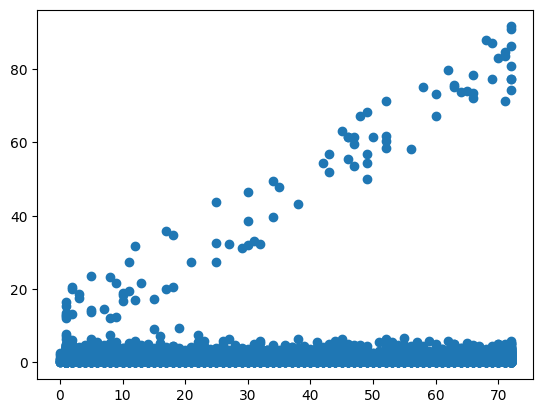

In [141]:
tenure_list = (data["tenure"])
age_list = ((data["tenure"]) + (np.random.uniform(0, 20, len(data["tenure"]))))

print(age_list * 20)
for i in range(len(age_list)):
    if not (i > 12 and i < 110):
        age_list[i] = np.random.exponential()

correlation = tenure_list.corr(age_list)
print(correlation)
plt.scatter(tenure_list, age_list)

(array([5.73270504e-03, 4.10828797e-06, 8.21657595e-07, 2.46497278e-06,
        1.64331519e-06, 4.10828797e-06, 1.64331519e-06, 8.21657595e-07,
        8.21657595e-07, 0.00000000e+00, 2.46497278e-06, 8.21657595e-07,
        4.92994557e-06, 4.10828797e-06, 8.21657595e-07, 3.28663038e-06,
        0.00000000e+00, 0.00000000e+00, 8.21657595e-07, 8.21657595e-07,
        1.64331519e-06, 0.00000000e+00, 2.46497278e-06, 8.21657595e-07,
        8.21657595e-07, 2.46497278e-06, 8.21657595e-07, 1.64331519e-06,
        8.21657595e-07, 8.21657595e-06]),
 array([4.96222481e-05, 1.72803113e+02, 3.45606177e+02, 5.18409240e+02,
        6.91212304e+02, 8.64015368e+02, 1.03681843e+03, 1.20962149e+03,
        1.38242456e+03, 1.55522762e+03, 1.72803069e+03, 1.90083375e+03,
        2.07363681e+03, 2.24643988e+03, 2.41924294e+03, 2.59204600e+03,
        2.76484907e+03, 2.93765213e+03, 3.11045519e+03, 3.28325826e+03,
        3.45606132e+03, 3.62886439e+03, 3.80166745e+03, 3.97447051e+03,
        4.14727358e+03

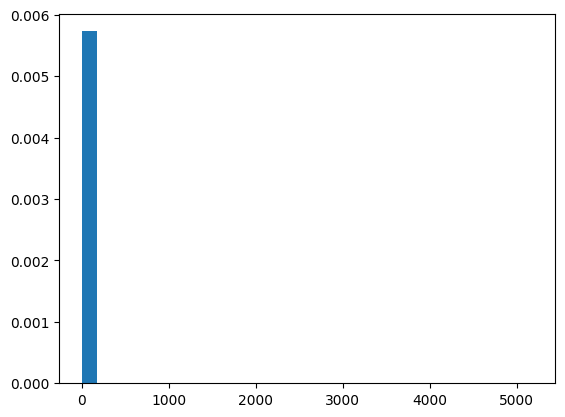

In [140]:
plt.hist(age_list, 30,density= True)

In [124]:
import numpy as np
import pandas as pd

# Load your first DataFrame (table 1)
df1 = pd.DataFrame({
    'column_A': np.random.randn(100)  # Example column with random data
})

# Load the second DataFrame (table 2)
df2 = pd.DataFrame({
    'column_B': np.random.randn(100)  # Example column from another table
})

# Ensure that 'column_B' is positively correlated with 'column_A'
# Let's make a new column in df1 that's correlated with column_B in df2

# First, create a positive correlation by multiplying column_B by a factor, and add some noise
df1['new_column'] = df2['column_B'] * 0.5 + np.random.normal(0, 0.1, 100)

# Check the correlation
correlation = df1['new_column'].corr(df2['column_B'])
print(f"Correlation between new_column and column_B: {correlation}")


Correlation between new_column and column_B: 0.9752746110491627


In [125]:
# Opposing non-linear transformations
df1['new_column'] = np.where(df2['column_B'] > 0, np.log(df2['column_B'] + 1), np.sin(df2['column_B']))

# Check the correlation
correlation = df1['new_column'].corr(df2['column_B'])
print(f"Correlation between new_column and column_B: {correlation}")


Correlation between new_column and column_B: 0.9817590790144257


c:\Users\mohamed gamal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


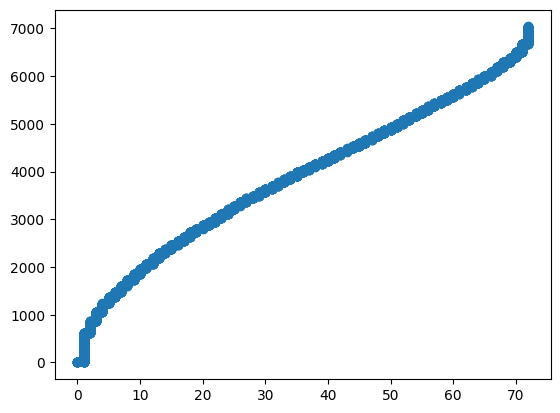

In [147]:
data = data.sort_values(by="tenure", ascending= True)
plt.scatter((data["tenure"]), [i for i in range(0,len(data["tenure"]))])

the correlation = 0.9680236027224925


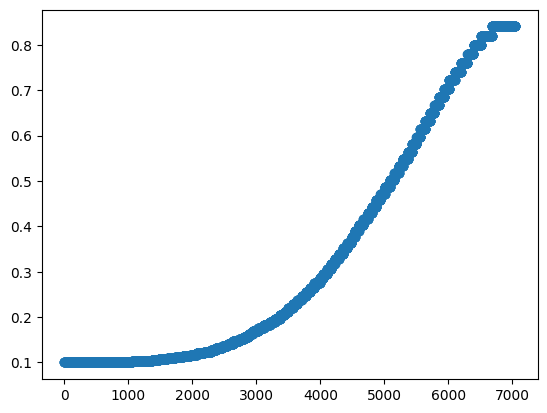

In [243]:
age = ((data["tenure"])**2 - np.random.exponential(0.5))/7000 + 0.1



plt.scatter([i for i in range(len(age))], age)

print(f"the correlation = {data["tenure"].corr(age)}")

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,

(array([0.00190468, 0.27721696, 0.07913064, 0.03913244, 0.03030167,
        0.        , 0.02891645, 0.0294359 , 0.02320242, 0.01558371,
        0.01471795, 0.        , 0.02995536, 0.01367904, 0.01246697,
        0.00986969, 0.        , 0.01246697, 0.01246697, 0.0112549 ,
        0.01194751, 0.01108175, 0.        , 0.0112549 , 0.01523741,
        0.00865762, 0.0112549 , 0.        , 0.01021599, 0.00969653,
        0.        , 0.01108175, 0.01212067, 0.        , 0.0112549 ,
        0.        , 0.0112549 , 0.00883077, 0.        , 0.0105623 ,
        0.        , 0.01281328, 0.01177436, 0.        , 0.        ,
        0.01108175, 0.01142806, 0.        , 0.01177436, 0.        ,
        0.01177436, 0.        , 0.01385219, 0.        , 0.01212067,
        0.        , 0.01177436, 0.        , 0.01108175, 0.        ,
        0.01385219, 0.        , 0.        , 0.0112549 , 0.01160121,
        0.        , 0.        , 0.01038914, 0.        , 0.01315958,
        0.        , 0.01315958, 0.        , 0.  

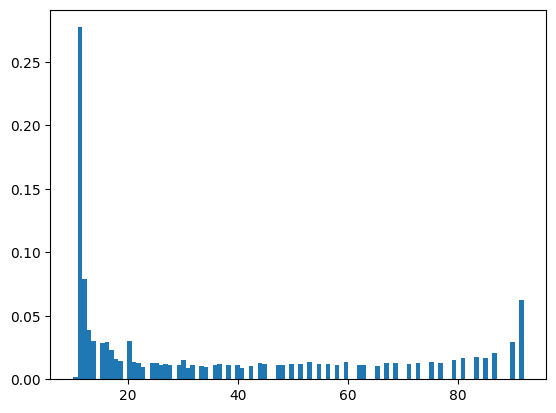

In [244]:
age = [int(abs(i) * 110) for i in age]
print(age)


plt.hist(age, 100, density = True)

In [224]:
data = data.drop("age", axis = 1)
data.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,city,zip_code,city_code,Plan,bundle
936,5709-LVOEQ,Female,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Mailed check,80.85,,No,Dallas,75201,214,DSL_plan_5,DSL_plan_5
753,3115-CZMZD,Male,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No,Mailed check,20.25,,No,San Diego,92101,858,No_unknown_plan,No_unknown_plan
5218,2923-ARZLG,Male,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,Yes,Mailed check,19.70,,No,San Diego,92101,858,No_unknown_plan,No_unknown_plan
3826,3213-VVOLG,Male,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No,Mailed check,25.35,,No,Seattle,98101,206,No_unknown_plan,No_unknown_plan
488,4472-LVYGI,Female,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Bank transfer (automatic),52.55,,No,Dallas,75201,214,DSL_plan_18,DSL_plan_18


In [245]:
data["age"] = age

In [246]:
data.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,city,zip_code,city_code,Plan,bundle,age
936,5709-LVOEQ,Female,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Mailed check,80.85,,No,Dallas,75201,214,DSL_plan_5,DSL_plan_5,10
753,3115-CZMZD,Male,No,Yes,0,Yes,No,No,No internet service,No internet service,...,Mailed check,20.25,,No,San Diego,92101,858,No_unknown_plan,No_unknown_plan,10
5218,2923-ARZLG,Male,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,Mailed check,19.70,,No,San Diego,92101,858,No_unknown_plan,No_unknown_plan,10
3826,3213-VVOLG,Male,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,Mailed check,25.35,,No,Seattle,98101,206,No_unknown_plan,No_unknown_plan,10
488,4472-LVYGI,Female,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),52.55,,No,Dallas,75201,214,DSL_plan_18,DSL_plan_18,10


In [247]:
shuffled_df = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [248]:
shuffled_df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,city,zip_code,city_code,Plan,bundle,age
0,5376-DEQCP,Female,No,No,1,Yes,No,Fiber optic,No,No,...,Electronic check,70.60,70.6,Yes,San Diego,92101,858,Fiber optic_plan_64,Fiber optic_plan_64,11
1,6877-LGWXO,Male,Yes,No,18,Yes,No,Fiber optic,No,No,...,Electronic check,78.55,1422.65,Yes,Dallas,75201,214,Fiber optic_plan_63,Fiber optic_plan_63,16
2,5951-AOFIH,Male,No,No,33,Yes,No,DSL,No,Yes,...,Credit card (automatic),66.40,2245.4,No,San Antonio,78201,210,DSL_plan_38,DSL_plan_38,28
3,2018-PZKMU,Male,Yes,Yes,9,Yes,No,Fiber optic,No,No,...,Electronic check,103.10,970.45,No,Dallas,75201,214,Fiber optic_plan_49,Fiber optic_plan_49,12
4,4074-SJFFA,Female,No,No,1,Yes,No,DSL,No,No,...,Mailed check,54.75,54.75,Yes,Austin,73301,512,DSL_plan_63,DSL_plan_63,11


In [249]:
shuffled_df.to_csv("telco_corr_high.csv", index = False)

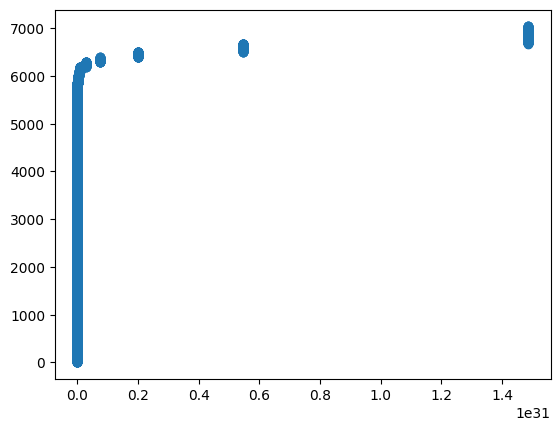

In [148]:
def correlate_exponential(df, column, factor=0.8, noise_std=0.1):

    df[column] = np.abs(df[column])
    
    exp_values = np.exp(df[column])
    
    noise = np.random.normal(0, noise_std, len(df))
    
    new_column = factor * exp_values + (1 - factor) * noise
    
    return new_column

df = pd.DataFrame()

df["Ages"] = correlate_exponential(data, "tenure")

plt.scatter(df["Ages"], [i for i in range(0,len(data["tenure"]))])

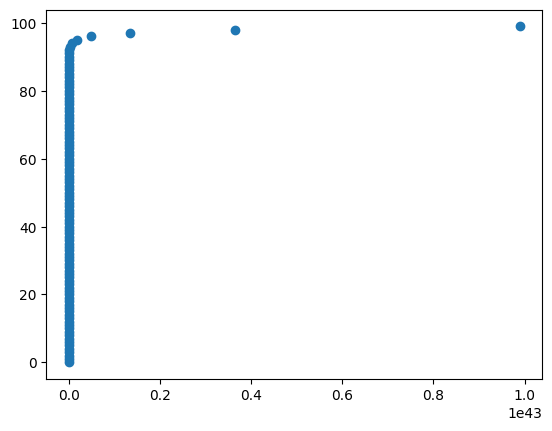

In [170]:
plt.scatter(np.exp([i for i in range(100)]), [i for i in range(100)])

In [158]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) + 50

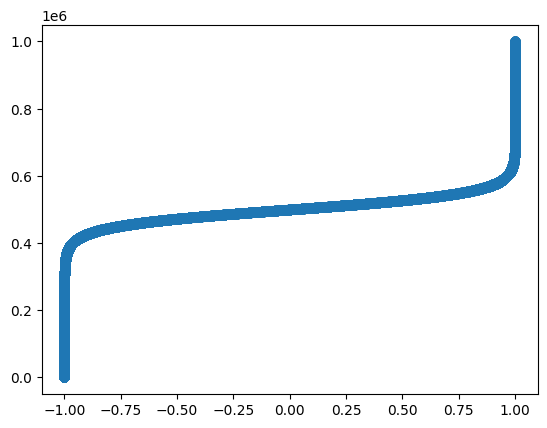

In [165]:
funct = np.tanh(np.linspace(-10, 10, 1000000))

plt.scatter(funct, [i for i in range(len(funct))])

C:\Users\mohamed gamal\AppData\Local\Temp\ipykernel_9324\3842857988.py:13: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c)


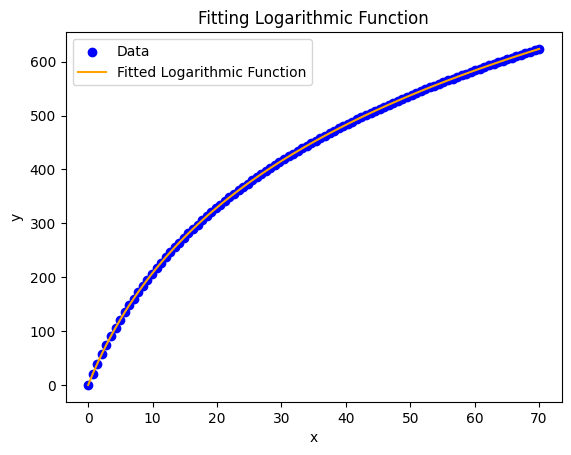

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


a, b, c = 300, 0.1, 1
# Sample data points (x and y) based on the graph you provided
x_data = np.linspace(0, 70, num=100)
y_data = a * np.log(b * x_data + c)  # Replace with actual fitting parameters

# Define the logarithmic function
def logarithmic_func(x, a, b, c):
    return a * np.log(b * x + c)

# Fit the curve
params, covariance = curve_fit(logarithmic_func, x_data, y_data)

# Generate fitted values
y_fit = logarithmic_func(x_data, *params)

# Plot original data and fitted curve
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, y_fit, label='Fitted Logarithmic Function', color='orange')
plt.title('Fitting Logarithmic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
data = pd.read_csv("D:\++\depi project\Telco_extended.csv")

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
C:\Users\mohamed gamal\AppData\Local\Temp\ipykernel_5772\3342660688.py:1: SyntaxWarning: invalid escape sequence '\+'
  data = pd.read_csv("D:\++\depi project\Telco_extended.csv")


In [8]:
lst = [i for i in range(1,(len(data["tenure"]) + 1))]

In [9]:
print(lst)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [12]:
data["numbering"] = lst

In [13]:
data.to_csv("telco_extended_5aleth.csv", index = False)